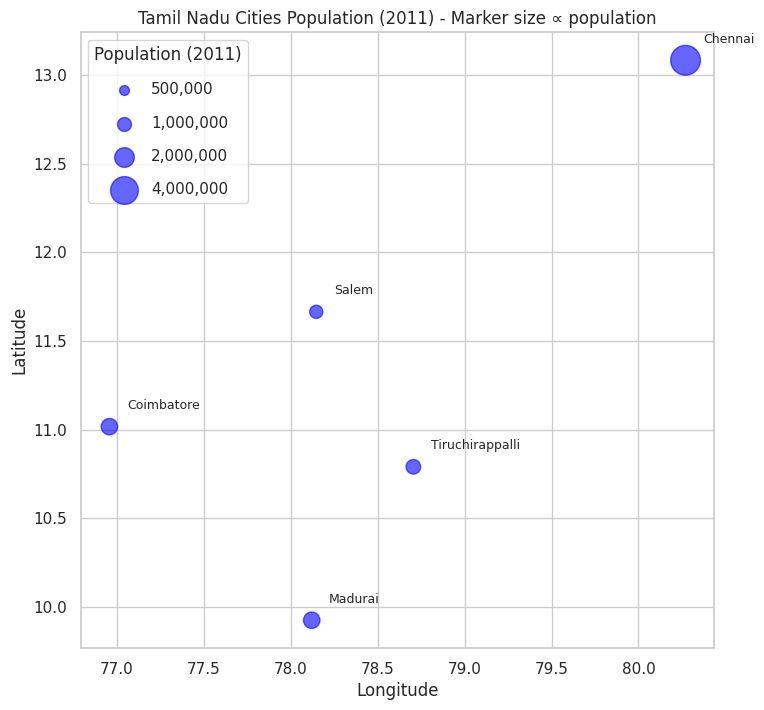

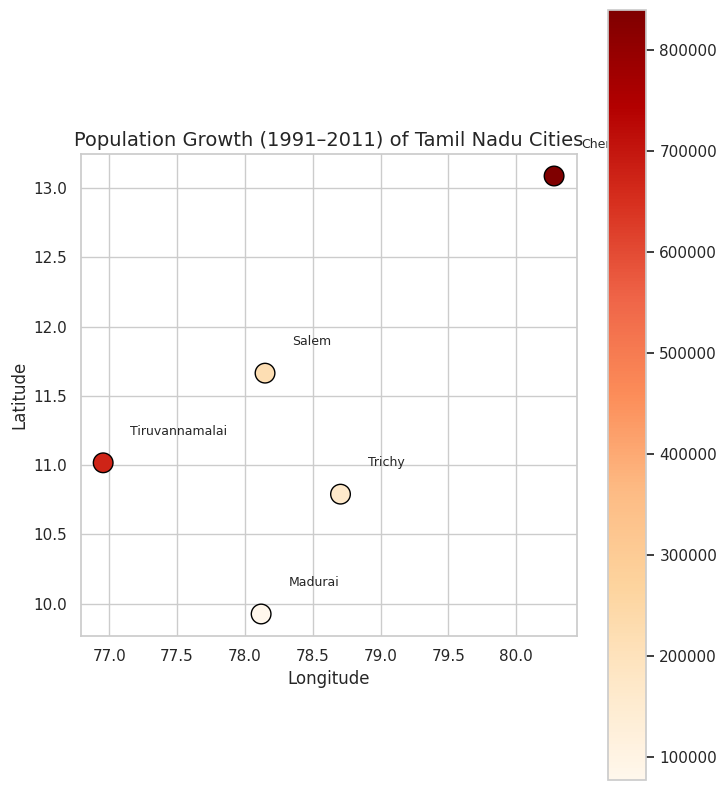

In [19]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

data = {
    'Name': ['Chennai', 'Coimbatore', 'Madurai', 'Tiruchirappalli', 'Salem'],
    'Status': ['City', 'City', 'City', 'City', 'City'],
    'District': ['Chennai', 'Coimbatore', 'Madurai', 'Tiruchirappalli', 'Salem'],
    'Pop_1991': [3700000, 1000000, 1100000, 900000, 700000],
    'Pop_2001': [4400000, 1200000, 1300000, 1000000, 850000],
    'Pop_2011': [4600000, 1400000, 1400000, 1100000, 900000],
    'Latitude': [13.0827, 11.0168, 9.9252, 10.7905, 11.6643],
    'Longitude': [80.2707, 76.9558, 78.1198, 78.7047, 78.1460]
}

df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 8))

gdf.plot(ax=ax, color='blue', markersize=gdf['Pop_2011'] / 10000, alpha=0.6)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Name):
    ax.text(x + 0.1, y + 0.1, label, fontsize=9)

import matplotlib.lines as mlines

for pop in [500000, 1000000, 2000000, 4000000]:
    ax.scatter([], [], s=pop/10000, color='blue', alpha=0.6, label=f'{pop:,}')

ax.legend(scatterpoints=1, frameon=True, labelspacing=1.2, title='Population (2011)')
ax.set_title('Tamil Nadu Cities Population (2011) - Marker size ∝ population')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()



import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


data = {
    "Name of city or town": ["Chennai", "Tiruvannamalai", "Madurai", "Trichy", "Salem"],
    "District": ["Chennai", "Tiruvannamalai", "Madurai", "Tiruchirappalli", "Salem"],
    "1991-03-01": [3841396, 930882, 940989, 752066, 696760],
    "2001-03-01": [4343645, 1050721, 922913, 847387, 831038],
    "2011-03-01": [4681087, 1601438, 1017865, 916857, 917414]
}


df = pd.DataFrame(data)
df["Growth_1991_2011"] = df["2011-03-01"] - df["1991-03-01"]

coords = {
    "Chennai": (80.2785, 13.0878),
    "Tiruvannamalai": (76.9558, 11.0168),
    "Madurai": (78.1198, 9.9252),
    "Trichy": (78.7047, 10.7905),
    "Salem": (78.1486, 11.6643)
}
df["Longitude"] = df["Name of city or town"].map(lambda x: coords[x][0])
df["Latitude"] = df["Name of city or town"].map(lambda x: coords[x][1])


geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")


fig, ax = plt.subplots(figsize=(8, 10))
gdf.plot(column="Growth_1991_2011", cmap="OrRd", legend=True, ax=ax,
         markersize=200, edgecolor="black")


for idx, row in gdf.iterrows():
    ax.text(row["Longitude"]+0.2, row["Latitude"]+0.2, row["Name of city or town"], fontsize=9)

ax.set_title("Population Growth (1991–2011) of Tamil Nadu Cities", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()



#Output: